In [4]:
import cv2
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import time
from skimage.color import rgb2gray

In [5]:
video_path = 'imgs_traffic.avi'
video_capture = cv2.VideoCapture(video_path)

In [6]:
#while video_capture.isOpened():
#    ret, frame = video_capture.read()
#    if not frame is None:
#        plt.imshow(frame)
#        plt.draw()
#        display.clear_output(wait=True)
#        display.display(plt.gcf())
#        time.sleep(.01)
#    else:
#        plt.draw()
#        display.clear_output(wait=True)
#        display.display(plt.gcf())
#        time.sleep(.01)
#        break
#video_capture.release()

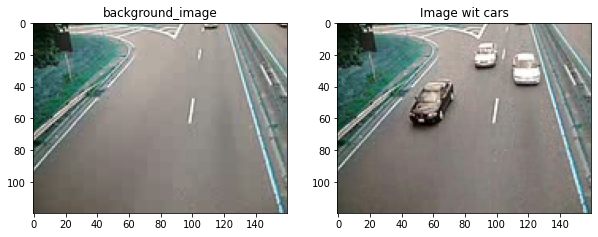

In [7]:
width  = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
height = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
length = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(video_capture.get(cv2.CAP_PROP_FPS))

video_capture.set(cv2.CAP_PROP_POS_FRAMES,0)
_, background_image = video_capture.read()
video_capture.set(cv2.CAP_PROP_POS_FRAMES, 67)
_, image_with_cars = video_capture.read()

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(background_image)
plt.title("background_image")
plt.subplot(122)
plt.title("Image wit cars")
plt.imshow(image_with_cars)

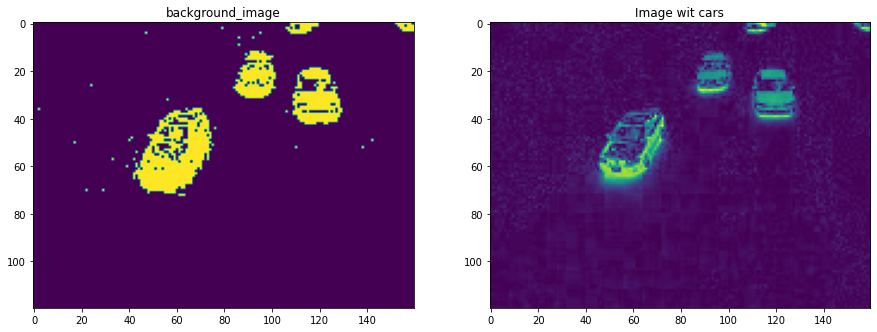

In [8]:
from skimage.measure import label, regionprops, regionprops_table
from skimage import morphology

diff_image = np.abs(rgb2gray(background_image) - rgb2gray(image_with_cars))
diff_thresholded = diff_image*255 > 20

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(diff_thresholded)
plt.title("background_image")
plt.subplot(122)
plt.title("Image wit cars")
plt.imshow(diff_image)

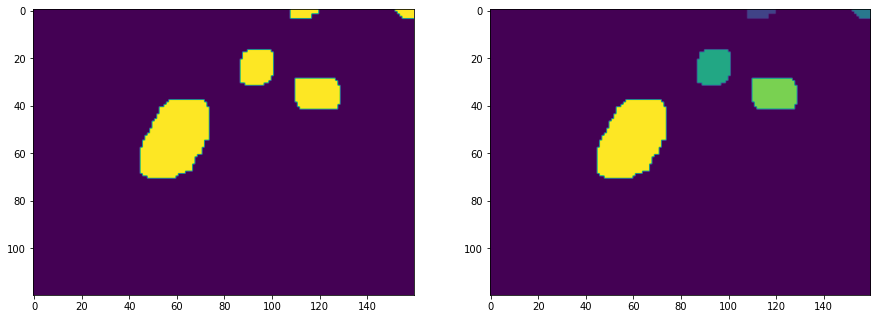

In [9]:
diff_thresholded = morphology.opening(
    morphology.remove_small_holes(diff_thresholded,area_threshold=64),
    selem= morphology.selem.rectangle(8,8))
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(diff_thresholded)

label_img = label(diff_thresholded)
regions = regionprops(label_img)
plt.subplot(122)
plt.imshow(label_img)

<Figure size 720x720 with 0 Axes>

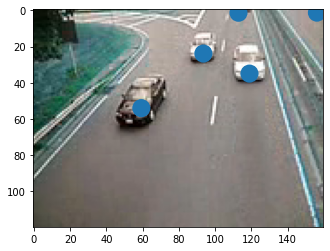

In [10]:
import matplotlib.patches as patches
plt.figure(figsize=(10,10))
fig,ax = plt.subplots(1)
ax.imshow(image_with_cars)
for region in regions:
    centroid_viz =patches.Circle((region.centroid[1], region.centroid[0]))
    ax.add_patch(centroid_viz)

In [13]:
from skimage.draw import disk
video_capture = cv2.VideoCapture(video_path)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('./imgs/tagged_cars.avi',fourcc, fps, (height,width))

while(video_capture.isOpened()):
    ret, frame = video_capture.read()
    if ret==True:

        diff_image = np.abs(rgb2gray(background_image) - rgb2gray(frame))

        diff_thresholded = diff_image*255 > 20

        diff_thresholded = morphology.opening(
        morphology.remove_small_holes(diff_thresholded,area_threshold=64),
        selem=morphology.selem.rectangle(8,8))

        label_img = label(diff_thresholded)
        regions = regionprops(label_img)

        for region in regions:
            rr, cc = disk((region.centroid[0], region.centroid[1]), 1)
            frame[rr, cc,:2] = 0
            frame[rr, cc, 2] = 255


        out.write(frame)
    else:
        break

video_capture.release()
out.release()